# 1. Thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('BTC_Dataset.csv')
df['ClosingPrice'] = df['Closing Price (USD)']/10000
df.pop('Currency')
df.pop('24h Open (USD)')
df.pop('24h High (USD)')
df.pop('24h Low (USD)')
df.pop('Closing Price (USD)')
df

,Date,ClosingPrice
0,2020-06-01,0.942767
1,2020-06-02,1.026858
2,2020-06-03,0.951614
3,2020-06-04,0.966706
4,2020-06-05,0.981137
...,...,...
381,2021-06-17,3.855748
382,2021-06-18,3.772202
383,2021-06-19,3.552045
384,2021-06-20,3.565630


In [3]:
#Lấy Date làm index

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)

### Vẽ sơ đồ minh họa

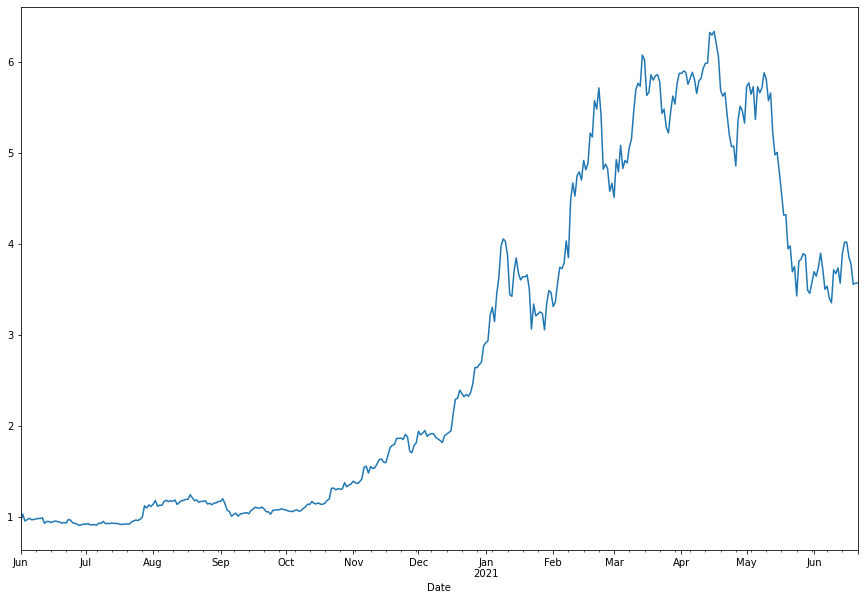

In [5]:
df['ClosingPrice'].plot(kind='line',figsize=(15, 10))

plt.show()

# 2. Tiền xử lý và Chia train/test

#### 2.1 Chi dữ liệu train test theo tỉ lệ train: 80%, test: 20%

In [6]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size

In [7]:
price =df[['ClosingPrice']]
price

,ClosingPrice
Date,
2020-06-01,0.942767
2020-06-02,1.026858
2020-06-03,0.951614
2020-06-04,0.966706
2020-06-05,0.981137
...,...
2021-06-17,3.855748
2021-06-18,3.772202
2021-06-19,3.552045


In [8]:
price = np.array(price)
price

array([[0.94276701],
       [1.0268582 ],
       [0.95161354],
       [0.96670608],
       [0.98113671],
       [0.96596613],
       [0.9677051 ],
       [0.97374586],
       [0.97919279],
       [0.9786142 ],
       [0.9874967 ],
       [0.92608326],
       [0.94642281],
       [0.94586598],
       [0.93519537],
       [0.9441769 ],
       [0.95106606],
       [0.94576271],
       [0.93986421],
       [0.92797608],
       [0.93530782],
       [0.92891045],
       [0.96809471],
       [0.96096802],
       [0.93111363],
       [0.92526334],
       [0.91717321],
       [0.90221538],
       [0.91018501],
       [0.91880614],
       [0.91484449],
       [0.92363168],
       [0.90977974],
       [0.90943246],
       [0.91246535],
       [0.90554645],
       [0.92788056],
       [0.92444158],
       [0.947176  ],
       [0.92361433],
       [0.92431753],
       [0.92298598],
       [0.9286737 ],
       [0.92389938],
       [0.9260471 ],
       [0.92110264],
       [0.91337778],
       [0.916

In [9]:
train, test = price[0:train_size,:], price[train_size:len(df),:]
print(len(train), len(test))

308 78


# 3. Thực hiện mô hình ARIMA

In [10]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [11]:
arima_model = arimamodel(train)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-430.132, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-433.732, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-432.086, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-432.066, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-430.424, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.534 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  308
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 218.866
Date:                Sun, 04 Jul 2021   AIC                           -433.732
Time:                        16:39:05   BIC                           -426.278
Sample:                             0   HQIC                          -430.751
                                - 308                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0157      0.007      2.313      0.021       0.002       0.029
sigma2         0.0141      0.001     25.822      0.000       0.013       0.015
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):               573.16
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):              40.61   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
ARIMA_predict = arima_model.predict(len(test))

# 4. Quá trình kết hợp SVR

In [13]:
prediction = pd.DataFrame(arima_model.predict(len(test)),index=df.tail(len(test)).index)
prediction.columns=['ARIMA_predict']

In [14]:
prediction['ClosingPrice']=df['ClosingPrice'].tail(len(test))

In [15]:
prediction

,ARIMA_predict,ClosingPrice
Date,,
2021-04-05,5.767444,5.817740
2021-04-06,5.783109,5.884356
2021-04-07,5.798773,5.804019
2021-04-08,5.814438,5.650894
2021-04-09,5.830103,5.788091
...,...,...
2021-06-17,6.910955,3.855748
2021-06-18,6.926620,3.772202
2021-06-19,6.942285,3.552045


In [16]:
prediction['Error'] = prediction['ClosingPrice'] -prediction['ARIMA_predict']

prediction

,ARIMA_predict,ClosingPrice,Error
Date,,,
2021-04-05,5.767444,5.817740,0.050296
2021-04-06,5.783109,5.884356,0.101247
2021-04-07,5.798773,5.804019,0.005245
2021-04-08,5.814438,5.650894,-0.163544
2021-04-09,5.830103,5.788091,-0.042012
...,...,...,...
2021-06-17,6.910955,3.855748,-3.055208
2021-06-18,6.926620,3.772202,-3.154418
2021-06-19,6.942285,3.552045,-3.390239


In [17]:
prediction['Date']=prediction.index
prediction

,ARIMA_predict,ClosingPrice,Error,Date
Date,,,,
2021-04-05,5.767444,5.817740,0.050296,2021-04-05
2021-04-06,5.783109,5.884356,0.101247,2021-04-06
2021-04-07,5.798773,5.804019,0.005245,2021-04-07
2021-04-08,5.814438,5.650894,-0.163544,2021-04-08
2021-04-09,5.830103,5.788091,-0.042012,2021-04-09
...,...,...,...,...
2021-06-17,6.910955,3.855748,-3.055208,2021-06-17
2021-06-18,6.926620,3.772202,-3.154418,2021-06-18
2021-06-19,6.942285,3.552045,-3.390239,2021-06-19


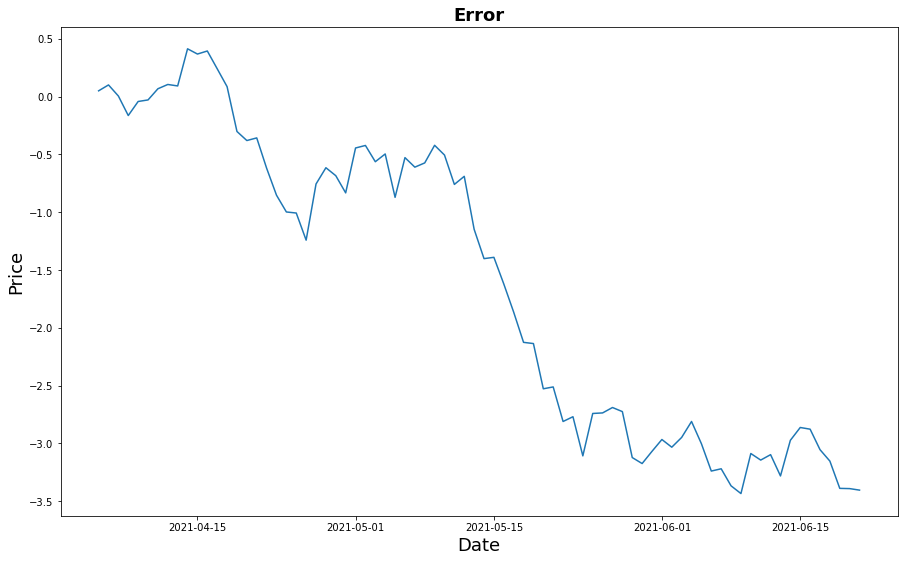

In [18]:
error = prediction[['Error']]

plt.figure(figsize = (15,9))
plt.plot(error)
plt.title("Error",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [19]:
error = np.array(error)
error

array([[ 0.05029586],
       [ 0.10124701],
       [ 0.00524528],
       [-0.16354373],
       [-0.04201198],
       [-0.02857618],
       [ 0.06816338],
       [ 0.10519401],
       [ 0.09255903],
       [ 0.41396321],
       [ 0.36856596],
       [ 0.39492461],
       [ 0.24115943],
       [ 0.08636111],
       [-0.30166488],
       [-0.38000227],
       [-0.35719999],
       [-0.61929875],
       [-0.85290008],
       [-0.99815613],
       [-1.00735816],
       [-1.24210442],
       [-0.75619339],
       [-0.61534251],
       [-0.68424171],
       [-0.83302825],
       [-0.44445767],
       [-0.42258933],
       [-0.56334707],
       [-0.49618523],
       [-0.87149614],
       [-0.52777477],
       [-0.61032453],
       [-0.57366199],
       [-0.42121762],
       [-0.50548398],
       [-0.759813  ],
       [-0.68967665],
       [-1.14791461],
       [-1.40194806],
       [-1.39075649],
       [-1.62112781],
       [-1.86489329],
       [-2.12657228],
       [-2.13707929],
       [-2

In [20]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [21]:
look_back = 3
testX, testY = create_dataset(error, look_back)
print(testX.shape)
print(testY.shape)

(74, 3)
(74,)


In [22]:
n_features = 1
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))
testX.shape

(74, 3, 1)

In [23]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()


In [24]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(testX, testY, epochs=300, verbose=1)

Epoch 1/300
3/3 [==============================] - 6s 8ms/step - loss: 4.1262
Epoch 2/300
3/3 [==============================] - 0s 15ms/step - loss: 4.2486
Epoch 3/300
3/3 [==============================] - 0s 12ms/step - loss: 3.9171
Epoch 4/300
3/3 [==============================] - 0s 24ms/step - loss: 3.9616
Epoch 5/300
3/3 [==============================] - 0s 16ms/step - loss: 3.9360
Epoch 6/300
3/3 [==============================] - 0s 6ms/step - loss: 3.4545
Epoch 7/300
3/3 [==============================] - 0s 5ms/step - loss: 3.4269
Epoch 8/300
3/3 [==============================] - 0s 5ms/step - loss: 3.3320
Epoch 9/300
3/3 [==============================] - 0s 6ms/step - loss: 3.2270
Epoch 10/300
3/3 [==============================] - 0s 4ms/step - loss: 3.0187
Epoch 11/300
3/3 [==============================] - 0s 6ms/step - loss: 2.6549
Epoch 12/300
3/3 [==============================] - 0s 7ms/step - loss: 2.3324
Epoch 13/300
3/3 [==============================] - 0s 6m

3/3 [==============================] - 0s 8ms/step - loss: 0.0520
Epoch 104/300
3/3 [==============================] - 0s 6ms/step - loss: 0.0494
Epoch 105/300
3/3 [==============================] - 0s 7ms/step - loss: 0.0440
Epoch 106/300
3/3 [==============================] - 0s 7ms/step - loss: 0.0391
Epoch 107/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0427
Epoch 108/300
3/3 [==============================] - 0s 7ms/step - loss: 0.0435
Epoch 109/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0426
Epoch 110/300
3/3 [==============================] - 0s 7ms/step - loss: 0.0416
Epoch 111/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0414
Epoch 112/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0434
Epoch 113/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0425
Epoch 114/300
3/3 [==============================] - 0s 12ms/step - loss: 0.0444
Epoch 115/300
3/3 [==============================] -

Epoch 204/300
3/3 [==============================] - 0s 6ms/step - loss: 0.0375
Epoch 205/300
3/3 [==============================] - 0s 10ms/step - loss: 0.0434
Epoch 206/300
3/3 [==============================] - 0s 6ms/step - loss: 0.0372
Epoch 207/300
3/3 [==============================] - 0s 7ms/step - loss: 0.0410
Epoch 208/300
3/3 [==============================] - 0s 6ms/step - loss: 0.0330
Epoch 209/300
3/3 [==============================] - 0s 6ms/step - loss: 0.0380
Epoch 210/300
3/3 [==============================] - 0s 7ms/step - loss: 0.0333
Epoch 211/300
3/3 [==============================] - 0s 6ms/step - loss: 0.0326
Epoch 212/300
3/3 [==============================] - 0s 6ms/step - loss: 0.0332
Epoch 213/300
3/3 [==============================] - 0s 6ms/step - loss: 0.0378
Epoch 214/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0331
Epoch 215/300
3/3 [==============================] - 0s 7ms/step - loss: 0.0370
Epoch 216/300
3/3 [====================

In [25]:
y_pred= model.predict(testX)


In [26]:
y_pred

array([[ 0.09453391],
       [-0.09406897],
       [-0.0324128 ],
       [-0.01390107],
       [ 0.09306423],
       [ 0.15854193],
       [ 0.16907239],
       [ 0.39696324],
       [ 0.43779424],
       [ 0.14307186],
       [ 0.04832378],
       [-0.15520634],
       [-0.3565409 ],
       [-0.3440585 ],
       [-0.42053798],
       [-0.6628683 ],
       [-0.92281514],
       [-1.0880085 ],
       [-1.0687046 ],
       [-1.2932714 ],
       [-0.7635118 ],
       [-0.5026075 ],
       [-0.7072825 ],
       [-0.8955803 ],
       [-0.5452159 ],
       [-0.39688918],
       [-0.62546015],
       [-0.6031926 ],
       [-0.8992254 ],
       [-0.6652683 ],
       [-0.5859984 ],
       [-0.65874386],
       [-0.49228746],
       [-0.5446976 ],
       [-0.8220412 ],
       [-0.8057996 ],
       [-1.1775607 ],
       [-1.485177  ],
       [-1.4630821 ],
       [-1.6928002 ],
       [-1.9585025 ],
       [-2.1893003 ],
       [-2.2681847 ],
       [-2.546805  ],
       [-2.569218  ],
       [-2

In [27]:
a = len(test)-(look_back+1)
a

74

In [28]:
LSTM_model = prediction.copy()

In [29]:
LSTM_model = LSTM_model.head(a)

In [30]:
LSTM_model

,ARIMA_predict,ClosingPrice,Error,Date
Date,,,,
2021-04-05,5.767444,5.817740,0.050296,2021-04-05
2021-04-06,5.783109,5.884356,0.101247,2021-04-06
2021-04-07,5.798773,5.804019,0.005245,2021-04-07
2021-04-08,5.814438,5.650894,-0.163544,2021-04-08
2021-04-09,5.830103,5.788091,-0.042012,2021-04-09
...,...,...,...,...
2021-06-13,6.848297,3.565516,-3.282781,2021-06-13
2021-06-14,6.863962,3.889456,-2.974506,2021-06-14
2021-06-15,6.879626,4.016232,-2.863394,2021-06-15


In [31]:
LSTM_model['Error_pred'] = y_pred
LSTM_model

,ARIMA_predict,ClosingPrice,Error,Date,Error_pred
Date,,,,,
2021-04-05,5.767444,5.817740,0.050296,2021-04-05,0.094534
2021-04-06,5.783109,5.884356,0.101247,2021-04-06,-0.094069
2021-04-07,5.798773,5.804019,0.005245,2021-04-07,-0.032413
2021-04-08,5.814438,5.650894,-0.163544,2021-04-08,-0.013901
2021-04-09,5.830103,5.788091,-0.042012,2021-04-09,0.093064
...,...,...,...,...,...
2021-06-13,6.848297,3.565516,-3.282781,2021-06-13,-2.864136
2021-06-14,6.863962,3.889456,-2.974506,2021-06-14,-2.921224
2021-06-15,6.879626,4.016232,-2.863394,2021-06-15,-3.062382


In [32]:
LSTM_model['ARIMA_LSTM']=LSTM_model['ARIMA_predict']+LSTM_model['Error_pred']
LSTM_model

,ARIMA_predict,ClosingPrice,Error,Date,Error_pred,ARIMA_LSTM
Date,,,,,,
2021-04-05,5.767444,5.817740,0.050296,2021-04-05,0.094534,5.861978
2021-04-06,5.783109,5.884356,0.101247,2021-04-06,-0.094069,5.689040
2021-04-07,5.798773,5.804019,0.005245,2021-04-07,-0.032413,5.766361
2021-04-08,5.814438,5.650894,-0.163544,2021-04-08,-0.013901,5.800537
2021-04-09,5.830103,5.788091,-0.042012,2021-04-09,0.093064,5.923167
...,...,...,...,...,...,...
2021-06-13,6.848297,3.565516,-3.282781,2021-06-13,-2.864136,3.984161
2021-06-14,6.863962,3.889456,-2.974506,2021-06-14,-2.921224,3.942738
2021-06-15,6.879626,4.016232,-2.863394,2021-06-15,-3.062382,3.817245


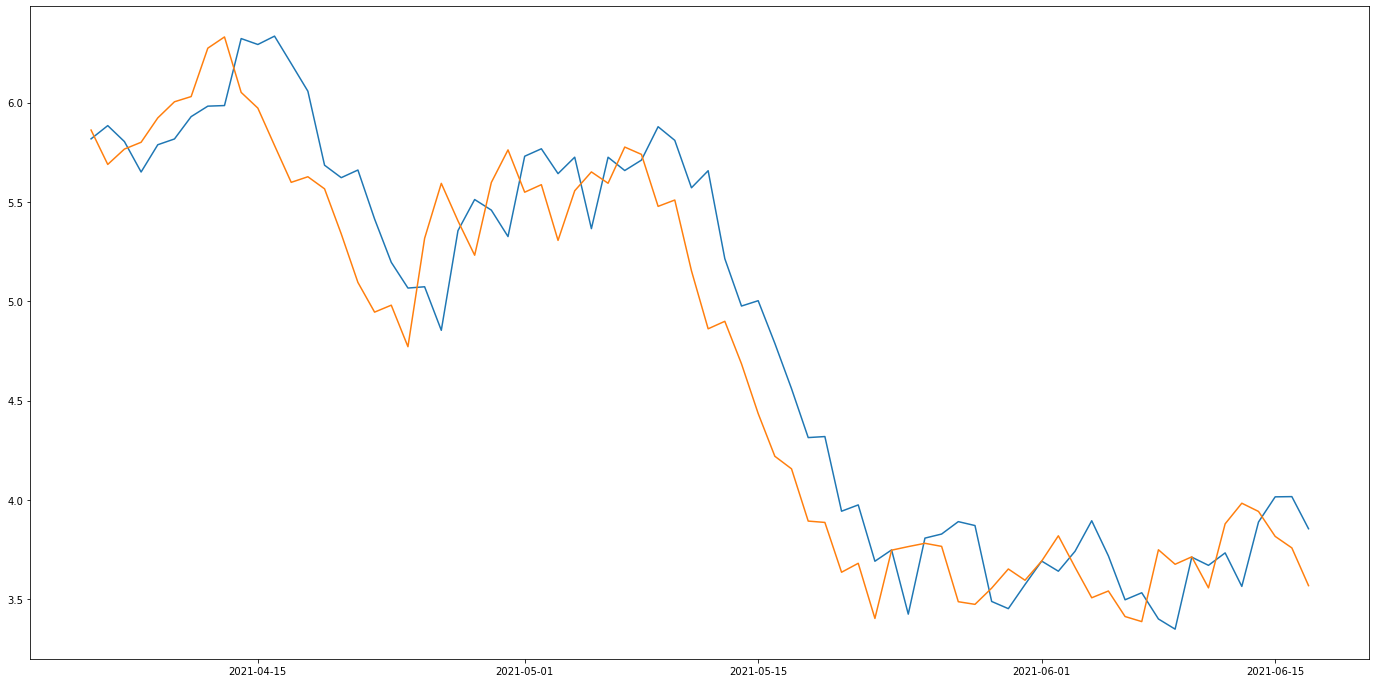

In [37]:
fig= plt.figure(figsize=(24,12))
plt.plot(LSTM_model.index,LSTM_model.ClosingPrice)
plt.plot(LSTM_model.index,LSTM_model.ARIMA_LSTM)
plt.show()

# 4. Đánh giá mô hình ARIMA

In [89]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [95]:
#MAPE
mean_absolute_percentage_error(LSTM_model.ClosingPrice,LSTM_model.ARIMA_LSTM)

5.597977509506273

In [96]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(LSTM_model.ClosingPrice,LSTM_model.ARIMA_LSTM)
RMSE = math.sqrt(MSE)
print(RMSE)

0.32284972850753757
